In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/PurchasingPowerDataset/Purchasing_power_dataset.csv'
df = pd.read_csv(file_path)
print(df.head())


  CustGender  CustAccountBalance  TransactionAmount (INR)  \
0          F            17819.05                     25.0   
1          F            17874.44                    459.0   
2          F           866503.21                   2060.0   
3          F             6714.43                   1762.5   
4          F            53609.20                    676.0   

   FrequencyOfPurchasing  Age  MonthlyTransactionAverage  RecencyDays  \
0                      1   30                     25.000           59   
1                      1   28                    459.000           59   
2                      5   22                    412.000           59   
3                      4   17                    440.625           59   
4                      5   22                    135.200           59   

   CustomerLifetimeValue  LoyaltyScore CustomerSegment  \
0               25469.05        685.35  Middle Balance   
1              158328.44         38.86  Middle Balance   
2              99257

In [ ]:
df.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,CustomerSegment,EstimatedYearlySpending,SavingsPotential,SavingsPotentialStatus,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Lifestyle
0,F,17819.05,25.0,1,30,25.000,59,25469.05,685.35,Middle Balance,300.0,17519.05,Surplus,0.016667,0.2,0.000018,0.066672,High Spender
1,F,17874.44,459.0,1,28,459.000,59,158328.44,38.86,Middle Balance,5508.0,12366.44,Surplus,0.016667,0.2,0.000333,0.066766,High Spender
2,F,866503.21,2060.0,5,22,412.000,59,992575.21,420.43,High Balance,4944.0,861559.21,Surplus,0.016667,1.0,0.000299,0.306756,Low Spender
3,F,6714.43,1762.5,4,17,440.625,59,141545.68,3.81,Middle Balance,5287.5,1426.93,Surplus,0.016667,0.8,0.000319,0.246762,Low Spender
4,F,53609.20,676.0,5,22,135.200,59,94980.40,79.19,High Balance,1622.4,51986.80,Surplus,0.016667,1.0,0.000098,0.306696,Low Spender


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932589 entries, 0 to 932588
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CustGender                 932589 non-null  object 
 1   CustAccountBalance         932589 non-null  float64
 2   TransactionAmount (INR)    932589 non-null  float64
 3   FrequencyOfPurchasing      932589 non-null  int64  
 4   Age                        932589 non-null  int64  
 5   MonthlyTransactionAverage  932589 non-null  float64
 6   RecencyDays                932589 non-null  int64  
 7   CustomerLifetimeValue      932589 non-null  float64
 8   LoyaltyScore               932589 non-null  float64
 9   CustomerSegment            932589 non-null  object 
 10  EstimatedYearlySpending    932589 non-null  float64
 11  SavingsPotential           932589 non-null  float64
 12  SavingsPotentialStatus     932589 non-null  object 
 13  RecencyScore               93

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['CustGender'] = label_encoder.fit_transform(df['CustGender'])
df['CustomerSegment'] = label_encoder.fit_transform(df['CustomerSegment'])
df['SavingsPotentialStatus'] = label_encoder.fit_transform(df['SavingsPotentialStatus'])
df['Lifestyle'] = label_encoder.fit_transform(df['LoyaltyScore'])

In [ ]:
df.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,CustomerSegment,EstimatedYearlySpending,SavingsPotential,SavingsPotentialStatus,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Lifestyle
0,0,17819.05,25.0,1,30,25.000,59,25469.05,685.35,2,300.0,17519.05,1,0.016667,0.2,0.000018,0.066672,57008
1,0,17874.44,459.0,1,28,459.000,59,158328.44,38.86,2,5508.0,12366.44,1,0.016667,0.2,0.000333,0.066766,3886
2,0,866503.21,2060.0,5,22,412.000,59,992575.21,420.43,0,4944.0,861559.21,1,0.016667,1.0,0.000299,0.306756,40096
3,0,6714.43,1762.5,4,17,440.625,59,141545.68,3.81,2,5287.5,1426.93,1,0.016667,0.8,0.000319,0.246762,381
4,0,53609.20,676.0,5,22,135.200,59,94980.40,79.19,0,1622.4,51986.80,1,0.016667,1.0,0.000098,0.306696,7919


In [ ]:
# Example: Customer engagement score
df['CustomerEngagement'] = df['FrequencyOfPurchasing'] * df['RecencyDays']


In [ ]:
df.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),FrequencyOfPurchasing,Age,MonthlyTransactionAverage,RecencyDays,CustomerLifetimeValue,LoyaltyScore,CustomerSegment,EstimatedYearlySpending,SavingsPotential,SavingsPotentialStatus,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Lifestyle,CustomerEngagement
0,0,17819.05,25.0,1,30,25.000,59,25469.05,685.35,2,300.0,17519.05,1,0.016667,0.2,0.000018,0.066672,57008,59
1,0,17874.44,459.0,1,28,459.000,59,158328.44,38.86,2,5508.0,12366.44,1,0.016667,0.2,0.000333,0.066766,3886,59
2,0,866503.21,2060.0,5,22,412.000,59,992575.21,420.43,0,4944.0,861559.21,1,0.016667,1.0,0.000299,0.306756,40096,295
3,0,6714.43,1762.5,4,17,440.625,59,141545.68,3.81,2,5287.5,1426.93,1,0.016667,0.8,0.000319,0.246762,381,236
4,0,53609.20,676.0,5,22,135.200,59,94980.40,79.19,0,1622.4,51986.80,1,0.016667,1.0,0.000098,0.306696,7919,295


CustomerSegment
0    408479
2    273067
1    251043
Name: count, dtype: int64


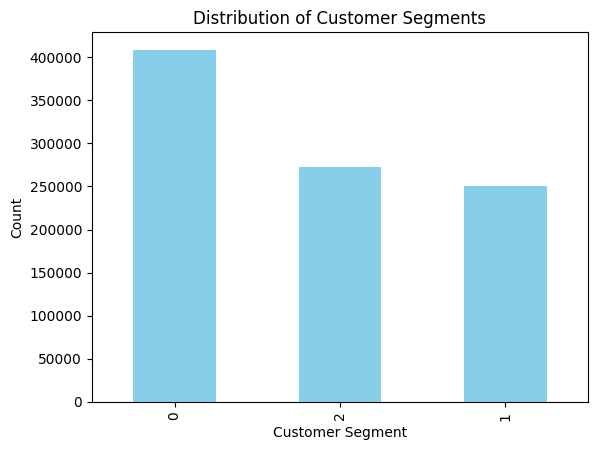

In [ ]:
# Checking the distribution of the target variable (CustomerSegment)
import pandas as pd

# Assuming your dataset is stored in a dataframe called df
print(df['CustomerSegment'].value_counts())

# Plotting the distribution
import matplotlib.pyplot as plt

df['CustomerSegment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()


In [ ]:

from sklearn.utils import resample

segment_0 = df[df['CustomerSegment'] == 0]
segment_1 = df[df['CustomerSegment'] == 1]
segment_2 = df[df['CustomerSegment'] == 2]

segment_0_downsampled = resample(segment_0, replace=False, n_samples=len(segment_1), random_state=42)

# Combine them back
df_balanced = pd.concat([segment_0_downsampled, segment_1, segment_2])

# Check the new distribution
print(df_balanced['CustomerSegment'].value_counts())


CustomerSegment
2    273067
0    251043
1    251043
Name: count, dtype: int64


In [ ]:
# Downsample segment 0 and segment 2 to match the size of segment 1
segment_0_downsampled = resample(segment_0, replace=False, n_samples=len(segment_1), random_state=42)
segment_2_downsampled = resample(segment_2, replace=False, n_samples=len(segment_1), random_state=42)

# Combine them back into a balanced dataframe
df_balanced = pd.concat([segment_0_downsampled, segment_1, segment_2_downsampled])

# Check the new distribution
print(df_balanced['CustomerSegment'].value_counts())


CustomerSegment
0    251043
1    251043
2    251043
Name: count, dtype: int64


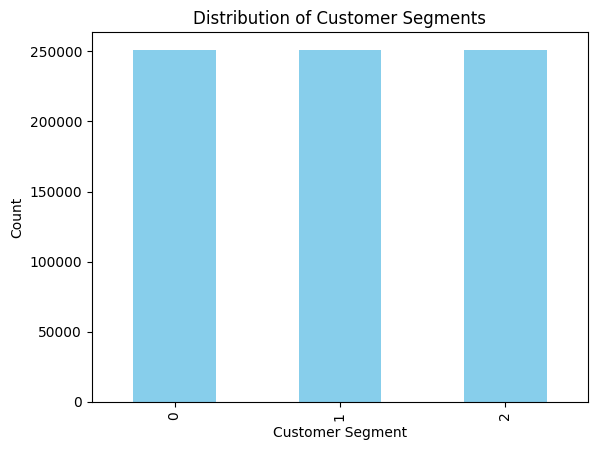

In [ ]:
# Plotting the distribution
import matplotlib.pyplot as plt

df_balanced['CustomerSegment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) - All columns except 'CustomerSegment'
X = df_balanced.drop('CustomerSegment', axis=1)

# Target variable (y) - The 'CustomerSegment' column
y = df_balanced['CustomerSegment']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50162
           1       1.00      1.00      1.00     50188
           2       1.00      1.00      1.00     50276

    accuracy                           1.00    150626
   macro avg       1.00      1.00      1.00    150626
weighted avg       1.00      1.00      1.00    150626



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())


Cross-validation scores: [1.         1.         1.         0.99997344 1.         1.
 0.99998672 1.         1.         1.        ]
Mean cross-validation score: 0.9999960166239561


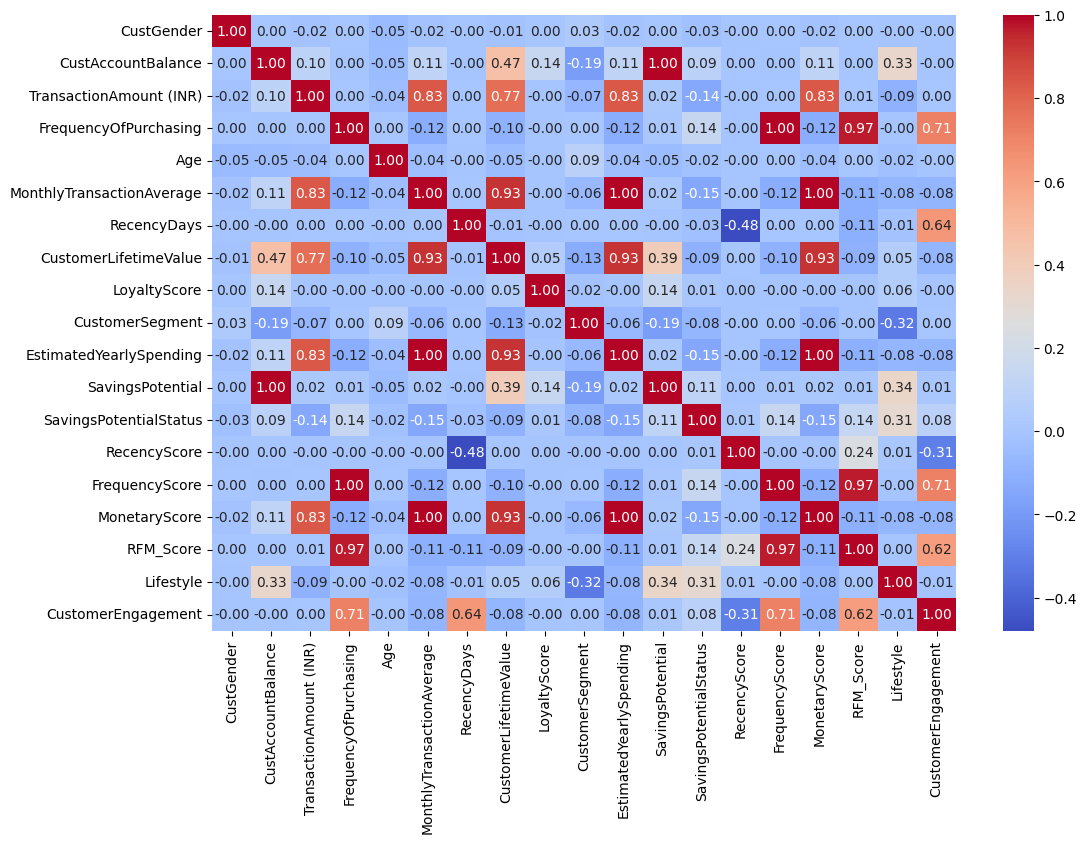

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking correlation matrix for potential leakage
correlation_matrix = df_balanced.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [ ]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['CustomerSegment'].sort_values(ascending=False) # Changed 'target' to 'CustomerSegment'
print(target_correlation)

CustomerSegment              1.000000
Age                          0.098987
CustGender                   0.040931
RecencyDays                  0.004189
CustomerEngagement           0.002821
FrequencyOfPurchasing        0.000208
FrequencyScore               0.000208
RFM_Score                   -0.000952
RecencyScore                -0.002819
LoyaltyScore                -0.016334
MonetaryScore               -0.058066
MonthlyTransactionAverage   -0.058066
EstimatedYearlySpending     -0.058066
TransactionAmount (INR)     -0.071627
CustomerLifetimeValue       -0.118612
SavingsPotentialStatus      -0.146626
SavingsPotential            -0.172949
CustAccountBalance          -0.177467
Lifestyle                   -0.336496
Name: CustomerSegment, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X_train.columns,
                                    'Importance': model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances)


                      Feature  Importance
1          CustAccountBalance    0.471904
10           SavingsPotential    0.253934
16                  Lifestyle    0.070668
8                LoyaltyScore    0.057784
7       CustomerLifetimeValue    0.054257
11     SavingsPotentialStatus    0.030721
2     TransactionAmount (INR)    0.018943
9     EstimatedYearlySpending    0.013584
5   MonthlyTransactionAverage    0.013043
14              MonetaryScore    0.011347
3       FrequencyOfPurchasing    0.001202
13             FrequencyScore    0.000828
15                  RFM_Score    0.000693
4                         Age    0.000693
17         CustomerEngagement    0.000277
6                 RecencyDays    0.000052
12               RecencyScore    0.000045
0                  CustGender    0.000026
